Część 1

Wartości odstające to wartości, które różnią się znacząco od większości danych w zbiorze. Mogą one wpłynąć na analizę danych, szczególnie na statystyki opisowe, takie jak średnia czy mediana. 

Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. populacji,

1.5. PKB,

1.6. 4 innych różnych informacji, które uznasz za istotne.

Zaimportowanie danych

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')



Wykres dla nowych zachorowań, śmierci oraz szczepień

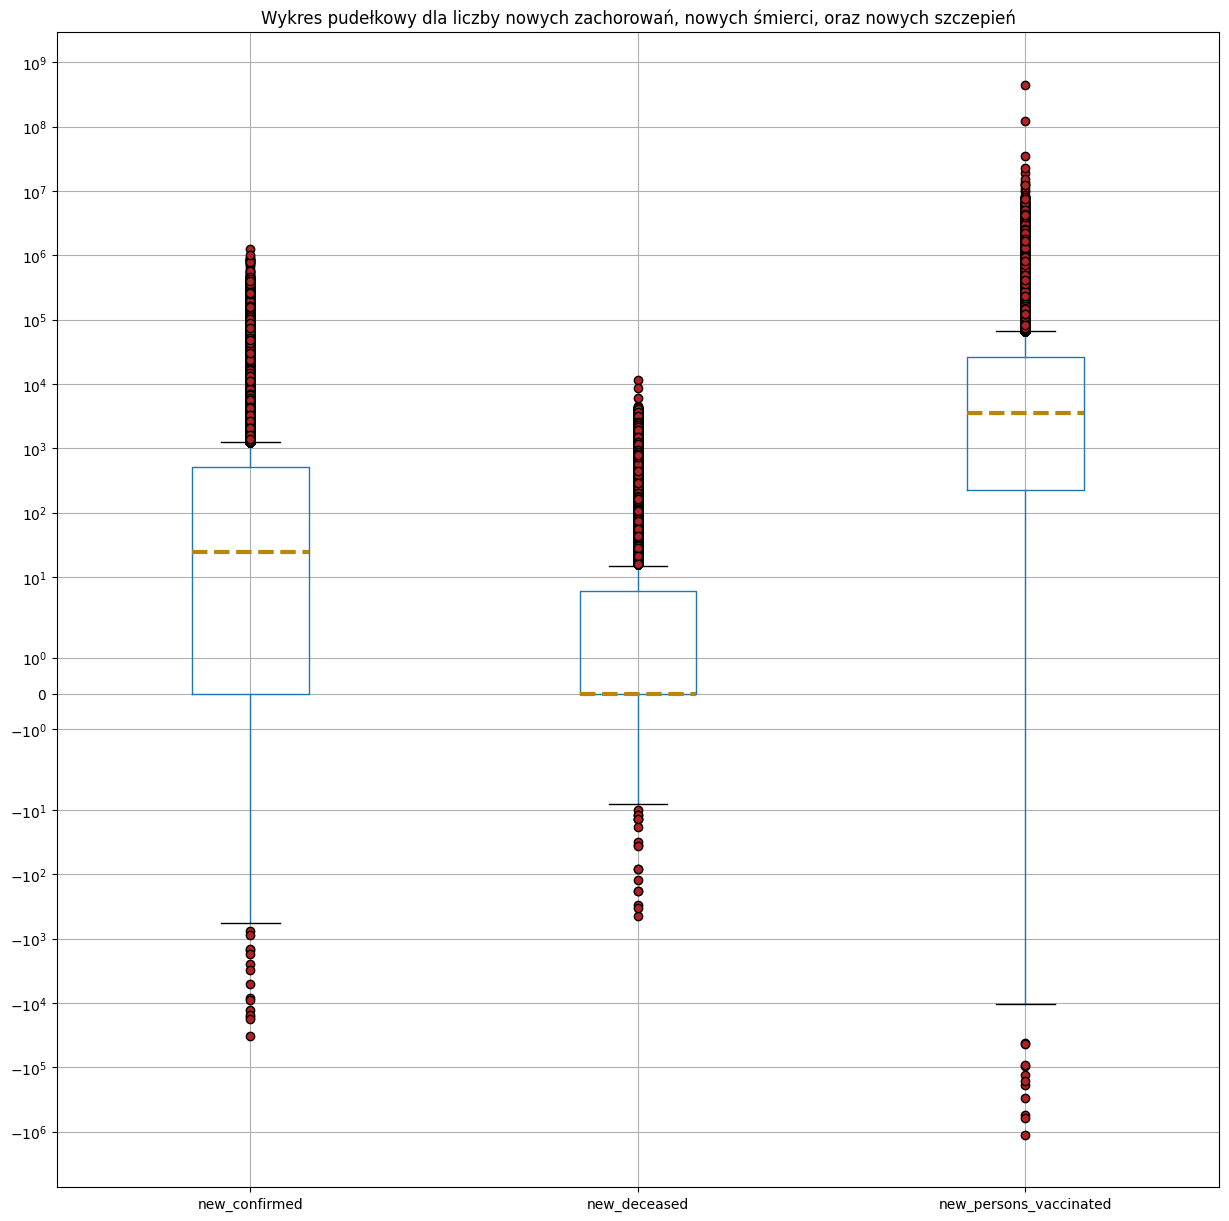

In [73]:
merged_covid_df.boxplot(["new_confirmed", "new_deceased", "new_persons_vaccinated"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

Wykres dla populacji oraz GDB

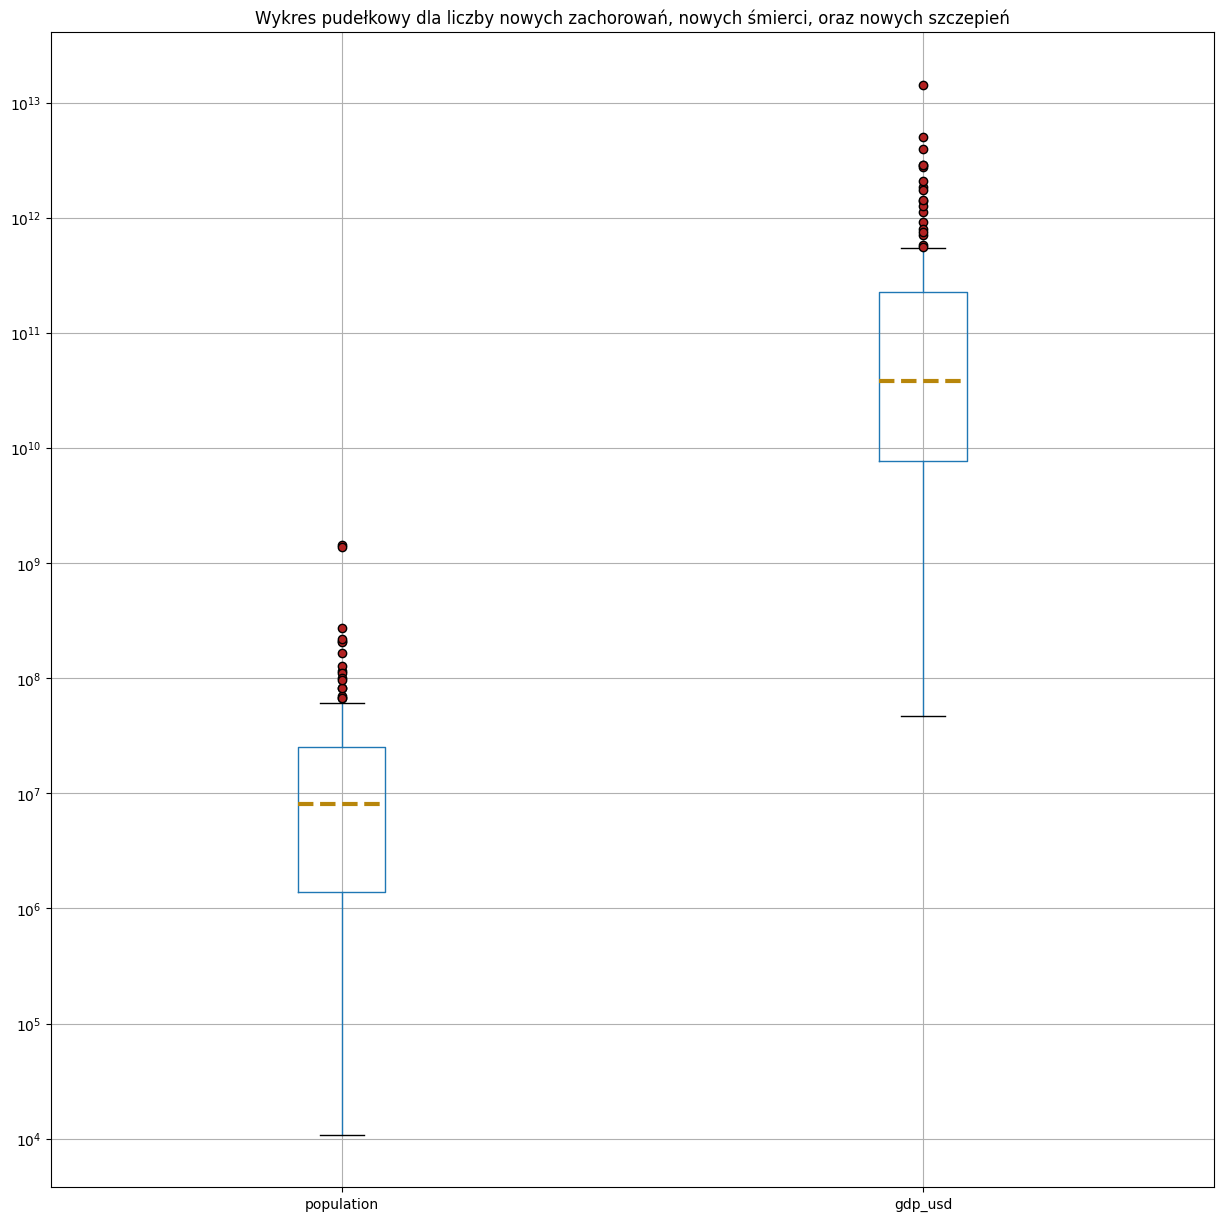

In [74]:
merged_country_df = pd.read_csv('wyniki\\merged_6_2.csv')

merged_country_df.boxplot(["population", "gdp_usd"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby nowych zachorowań, nowych śmierci, oraz nowych szczepień')
plt.show()

1.6 4 inne informacje


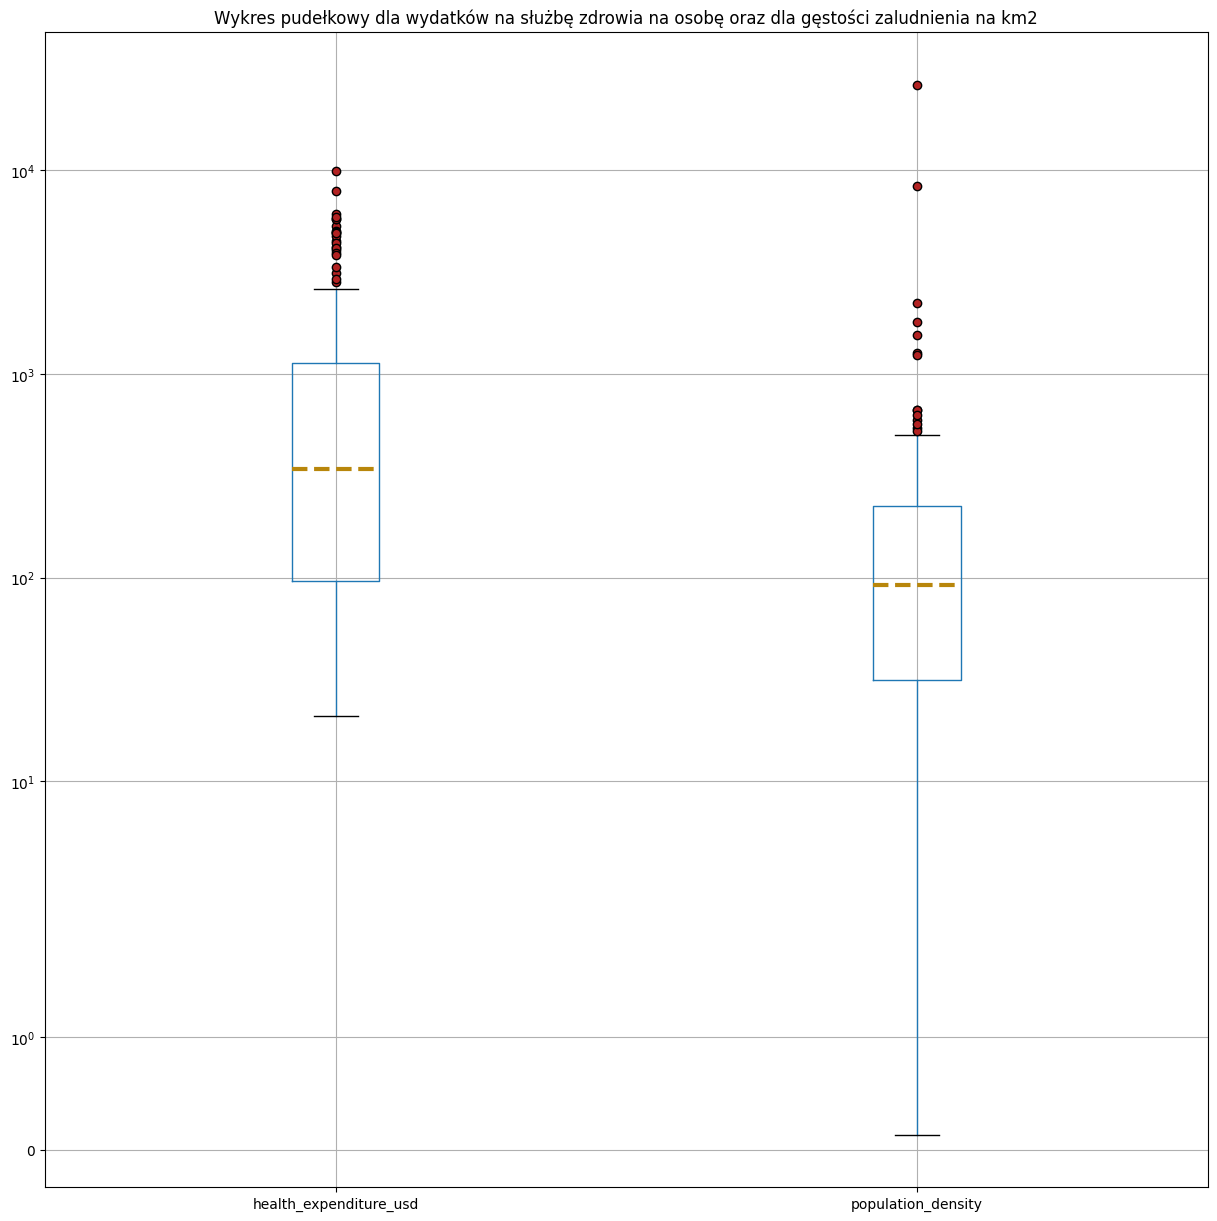

In [75]:

merged_country_df.boxplot(["health_expenditure_usd", "population_density"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla wydatków na służbę zdrowia na osobę oraz dla gęstości zaludnienia na km2')
plt.show()

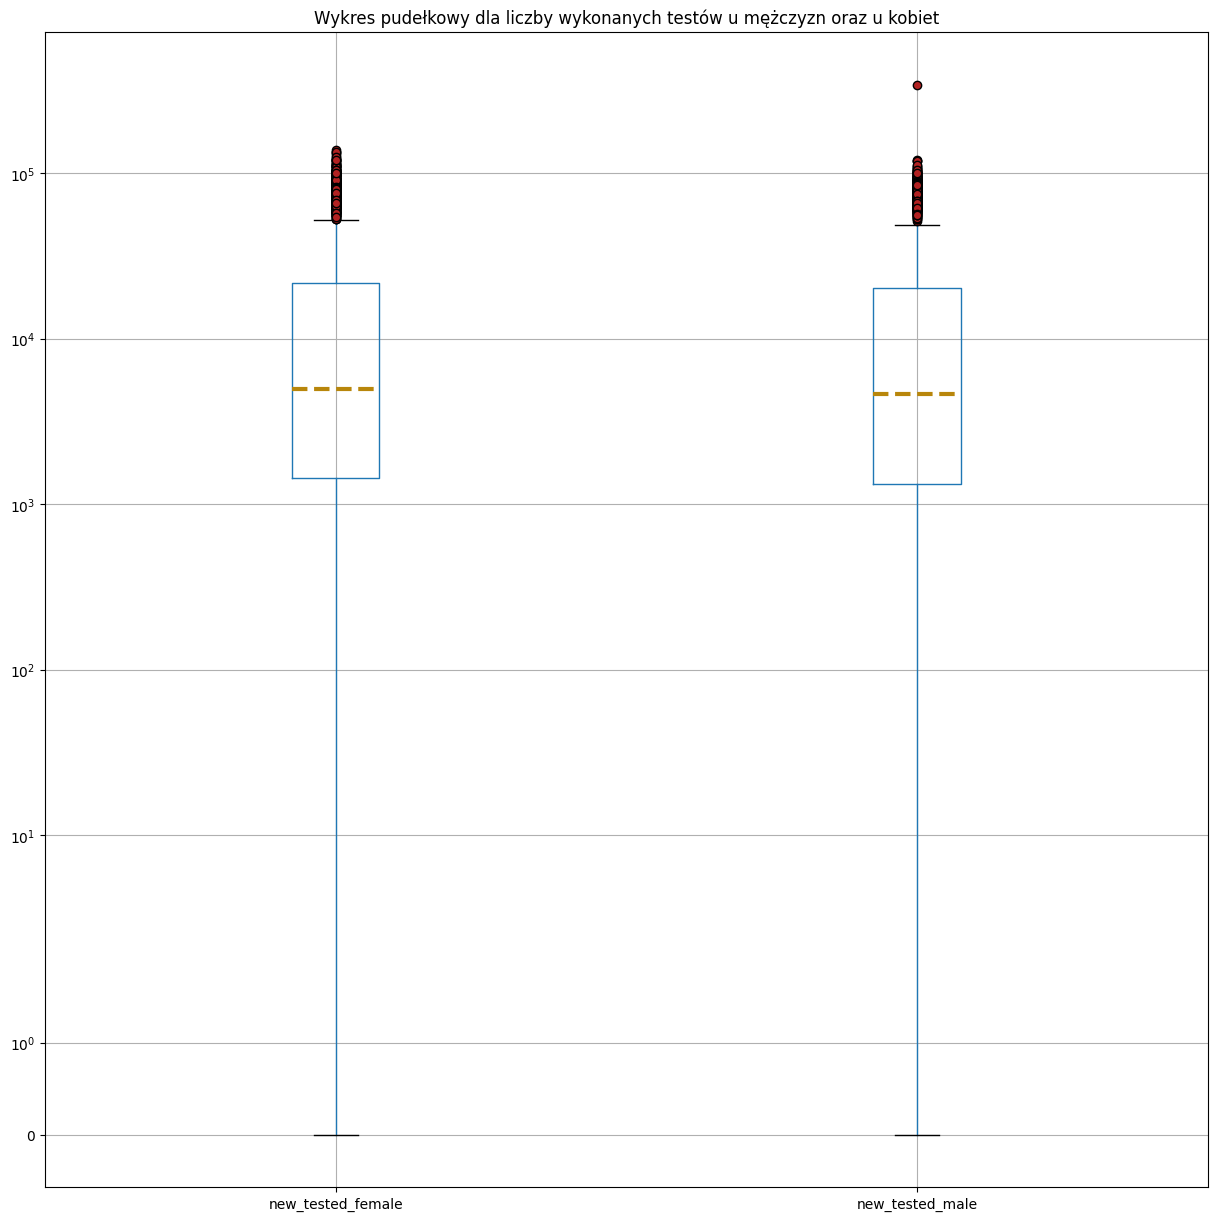

In [76]:
merged_covid_df.boxplot(["new_tested_female", "new_tested_male"], flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'firebrick'},
                  medianprops ={'linestyle':'--', 'linewidth':3, 'color':'darkgoldenrod'},  figsize=(15,15))
plt.yscale('symlog')
plt.title('Wykres pudełkowy dla liczby wykonanych testów u mężczyzn oraz u kobiet')
plt.show()

Część 2
Misja dodatkowa - Outliery

Metoda Z-Score

In [77]:
#Metoda Z-Score

df_ZSCORE = merged_covid_df.copy()

#Obliczenie czynnika zscore
df_ZSCORE['Z_Score_new_confirmed'] = (df_ZSCORE['new_confirmed'] - df_ZSCORE['new_confirmed'].mean()) / df_ZSCORE['new_confirmed'].std()
df_ZSCORE['Z_Score_new_deceased'] = (df_ZSCORE['new_deceased'] - df_ZSCORE['new_deceased'].mean()) / df_ZSCORE['new_deceased'].std()
df_ZSCORE['Z_Score_new_persons_vaccinated'] = (df_ZSCORE['new_persons_vaccinated'] - df_ZSCORE['new_persons_vaccinated'].mean()) / df_ZSCORE['new_persons_vaccinated'].std()

z_score_val2 = 2
z_score_val3 = 3

#Pojedyncze usuwanie dla każdej cechy dla zscore = 2
df_filtered1_val2 = df_ZSCORE[df_ZSCORE['Z_Score_new_confirmed'] <= z_score_val2]
df_filtered2_val2 = df_ZSCORE[df_ZSCORE['Z_Score_new_deceased'] <= z_score_val2]
df_filtered3_val2 = df_ZSCORE[df_ZSCORE['Z_Score_new_persons_vaccinated'] <= z_score_val2]

print("Ilość wierszy wszystkich danych: ", len(df_ZSCORE))
print("Z-Score = 2")
print("Usunięcie danych pojedynczej cechy")
print("Ilość wierszy po usunięciu new_confirmed: ", len(df_filtered1_val2))
print("Ilość wierszy po usunięciu: ", len(df_filtered2_val2))
print("Ilość wierszy po usunięciu new_persons_vaccinated: ", len(df_filtered3_val2))

df_filtered_val2 = df_ZSCORE[
    (df_ZSCORE['Z_Score_new_confirmed'] <= z_score_val2) &
    (df_ZSCORE['Z_Score_new_deceased'] <= z_score_val2) &
    (df_ZSCORE['Z_Score_new_persons_vaccinated'] <= z_score_val2)
]
print("Usunięcie wszystkich cech na raz:", len(df_filtered_val2))


#Pojedyncze usuwanie dla każdej cechy dla zscore = 2
df_filtered1_val3 = df_ZSCORE[df_ZSCORE['Z_Score_new_confirmed'] <= z_score_val3]
df_filtered2_val3 = df_ZSCORE[df_ZSCORE['Z_Score_new_deceased'] <= z_score_val3]
df_filtered3_val3 = df_ZSCORE[df_ZSCORE['Z_Score_new_persons_vaccinated'] <= z_score_val3]

print("Z-Score = 3")
print("Ilość wierszy po usunięciu new_confirmed: ", len(df_filtered1_val3))
print("Ilość wierszy po usunięciu: ", len(df_filtered2_val3))
print("Ilość wierszy po usunięciu new_persons_vaccinated: ", len(df_filtered3_val3))

df_filtered_val3 = df_ZSCORE[
    (df_ZSCORE['Z_Score_new_confirmed'] <= z_score_val3) &
    (df_ZSCORE['Z_Score_new_deceased'] <= z_score_val3) &
    (df_ZSCORE['Z_Score_new_persons_vaccinated'] <= z_score_val3)
]
print("Usunięcie wszystkich cech na raz:", len(df_filtered_val3))

Ilość wierszy wszystkich danych:  243786
Z-Score = 2
Usunięcie danych pojedynczej cechy
Ilość wierszy po usunięciu new_confirmed:  224194
Ilość wierszy po usunięciu:  222981
Ilość wierszy po usunięciu new_persons_vaccinated:  54641
Usunięcie wszystkich cech na raz: 49549
Z-Score = 3
Ilość wierszy po usunięciu new_confirmed:  225487
Ilość wierszy po usunięciu:  224512
Ilość wierszy po usunięciu new_persons_vaccinated:  54694
Usunięcie wszystkich cech na raz: 50990


In [78]:
#Metoda IQR

df_IQR = pd.DataFrame()

df_IQR = merged_covid_df.copy()

Q1_new_confirmed = df_IQR['new_confirmed'].quantile(0.25)
Q3_new_confirmed = df_IQR['new_confirmed'].quantile(0.75)
IQR_new_confirmed = Q3_new_confirmed - Q1_new_confirmed
lower_bound_new_confirmed = Q1_new_confirmed - 1.5 * IQR_new_confirmed
upper_bound_new_confirmed = Q3_new_confirmed + 1.5 * IQR_new_confirmed

Q1_new_deceased = df_IQR['new_deceased'].quantile(0.25)
Q3_new_deceased = df_IQR['new_deceased'].quantile(0.75)
IQR_new_deceased = Q3_new_deceased - Q1_new_deceased
lower_bound_new_deceased = Q1_new_deceased - 1.5 * IQR_new_deceased
upper_bound_new_deceased = Q3_new_deceased + 1.5 * IQR_new_deceased

Q1_new_persons_vaccinated = df_IQR['new_persons_vaccinated'].quantile(0.25)
Q3_new_persons_vaccinated = df_IQR['new_persons_vaccinated'].quantile(0.75)
IQR_new_persons_vaccinated = Q3_new_persons_vaccinated - Q1_new_persons_vaccinated
lower_bound_new_persons_vaccinated = Q1_new_persons_vaccinated - 1.5 * IQR_new_persons_vaccinated
upper_bound_new_persons_vaccinated = Q3_new_persons_vaccinated + 1.5 * IQR_new_persons_vaccinated

# filtrowanie pojedynczo
df_filtered_new_confirmed = df_IQR[(df_IQR['new_confirmed'] >= lower_bound_new_confirmed) & (df_IQR['new_confirmed'] <= upper_bound_new_confirmed)]
df_filtered_new_deceased = df_IQR[(df_IQR['new_deceased'] >= lower_bound_new_deceased) & (df_IQR['new_deceased'] <= upper_bound_new_deceased)]
df_filtered_new_persons_vaccinated = df_IQR[(df_IQR['new_persons_vaccinated'] >= lower_bound_new_persons_vaccinated) & (df_IQR['new_persons_vaccinated'] <= upper_bound_new_persons_vaccinated)]

print("Ilość wszystkich danych: ", len(df_IQR))
print("Usunięcie danych pojedynczej cechy")
print("Ilość wierszy po usunięciu new_confirmed: ", len(df_filtered_new_confirmed))
print("Ilość wierszy po usunięciu new_deceased: ", len(df_filtered_new_deceased))
print("Ilość wierszy po usunięciu new_persons_vaccinated: ", len(df_filtered_new_persons_vaccinated))


#filtrowanie wszystkich po kolei
df_filtered_new_confirmed = df_IQR[(df_IQR['new_confirmed'] >= lower_bound_new_confirmed) & (df_IQR['new_confirmed'] <= upper_bound_new_confirmed)]
# print(len(df_filtered_new_confirmed))

df_filtered_new_confirmed_and_deceased = df_filtered_new_confirmed[(df_filtered_new_confirmed['new_deceased'] >= lower_bound_new_deceased) & (df_filtered_new_confirmed['new_deceased'] <= upper_bound_new_deceased)]
# print(len(df_filtered_new_deceased))

df_filtered_new_confirmed_and_deceased_and_persons_vaccinated = df_filtered_new_confirmed_and_deceased[(df_filtered_new_confirmed_and_deceased['new_persons_vaccinated'] >= lower_bound_new_persons_vaccinated) & (df_filtered_new_confirmed_and_deceased['new_persons_vaccinated'] <= upper_bound_new_persons_vaccinated)]
print("Usunięcie wszystkich cech na raz:", len(df_filtered_new_confirmed_and_deceased_and_persons_vaccinated))
# print(len(df_filtered_new_persons_vaccinated))

Ilość wszystkich danych:  243786
Usunięcie danych pojedynczej cechy
Ilość wierszy po usunięciu new_confirmed:  189857
Ilość wierszy po usunięciu new_deceased:  190723
Ilość wierszy po usunięciu new_persons_vaccinated:  46314
Usunięcie wszystkich cech na raz: 26897


Część 3

Obliczenia statystyczne (m.in. średnia, mediana, moda, odchylenie standardowe) pozwolają na zrozumienie rozkładu danych oraz na identyfikację ewentualnych anomalii lub nietypowych wartości. 

Wykonaj następujące obliczenia:


3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

3.6. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.
Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

Przygotowanie danych

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


countries = ['Poland', 'Czech Republic', 'Germany', 'France', 'United Kingdom', 'Japan', 'Canada', 'Italy', 'Belgium', 'Denmark']


merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])
df_filtered = merged_covid_df[(merged_covid_df['date'].dt.year == 2021) & (merged_covid_df['date'].dt.month == 10) & (merged_covid_df['country_name'].isin(countries))]


3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


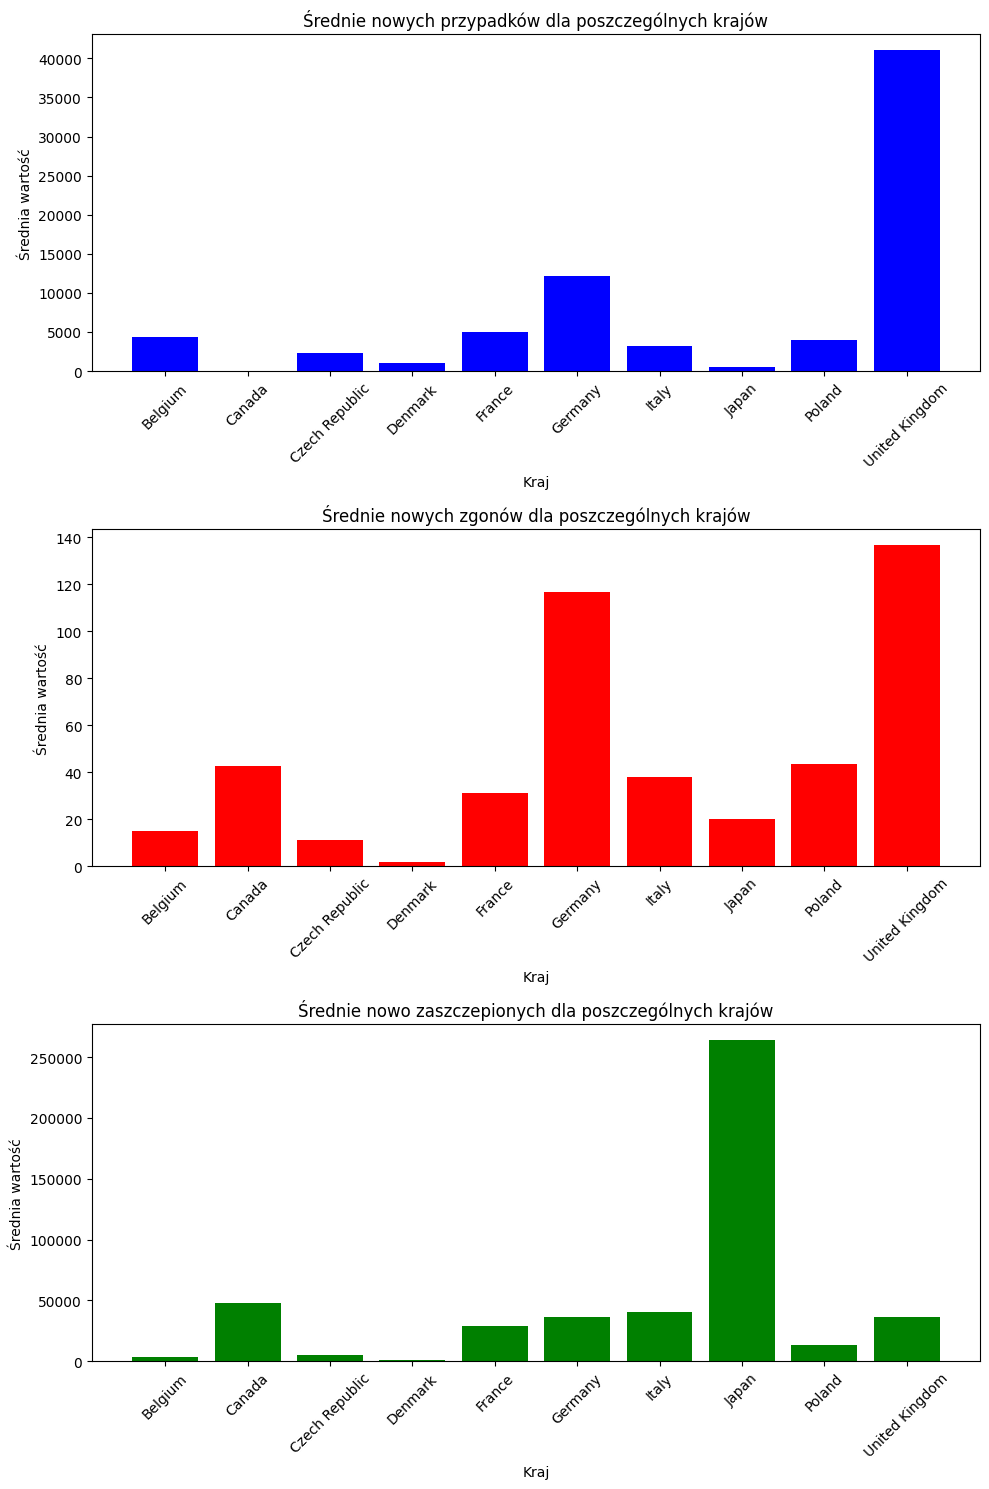

In [80]:
avg_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_deceased': 'mean', 'new_persons_vaccinated': 'mean'})
avg_values.reset_index(inplace=True)

index = np.arange(len(avg_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, avg_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Średnie nowych przypadków dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Średnia wartość')
ax[0].set_xticks(index)
ax[0].set_xticklabels(avg_values['country_name'], rotation=45)

ax[1].bar(index, avg_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Średnie nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Średnia wartość')
ax[1].set_xticks(index)
ax[1].set_xticklabels(avg_values['country_name'], rotation=45)

ax[2].bar(index, avg_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Średnie nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Średnia wartość')
ax[2].set_xticks(index)
ax[2].set_xticklabels(avg_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


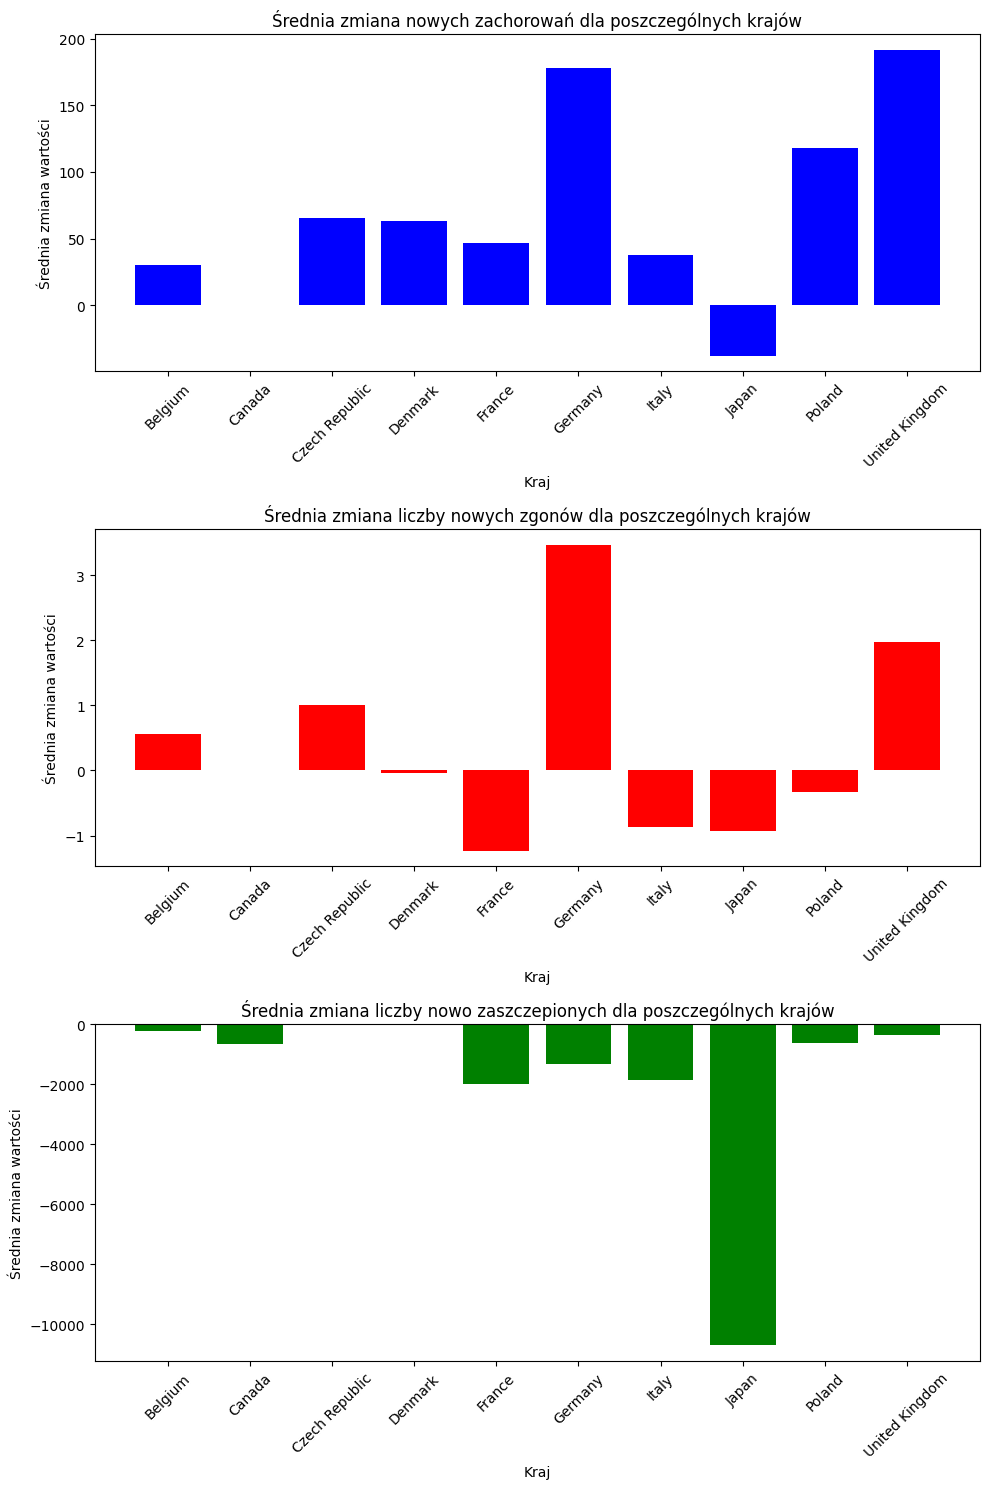

In [81]:
avg_diff_values = df_filtered.groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff()
avg_diff_values = avg_diff_values.groupby(df_filtered['country_name']).mean()
avg_diff_values.reset_index(inplace=True)

index = np.arange(len(avg_diff_values['country_name']))
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, avg_diff_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Średnia zmiana nowych zachorowań dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Średnia zmiana wartości')
ax[0].set_xticks(index)
ax[0].set_xticklabels(avg_diff_values['country_name'], rotation=45)

ax[1].bar(index, avg_diff_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Średnia zmiana liczby nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Średnia zmiana wartości')
ax[1].set_xticks(index)
ax[1].set_xticklabels(avg_diff_values['country_name'], rotation=45)

ax[2].bar(index, avg_diff_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Średnia zmiana liczby nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Średnia zmiana wartości')
ax[2].set_xticks(index)
ax[2].set_xticklabels(avg_diff_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


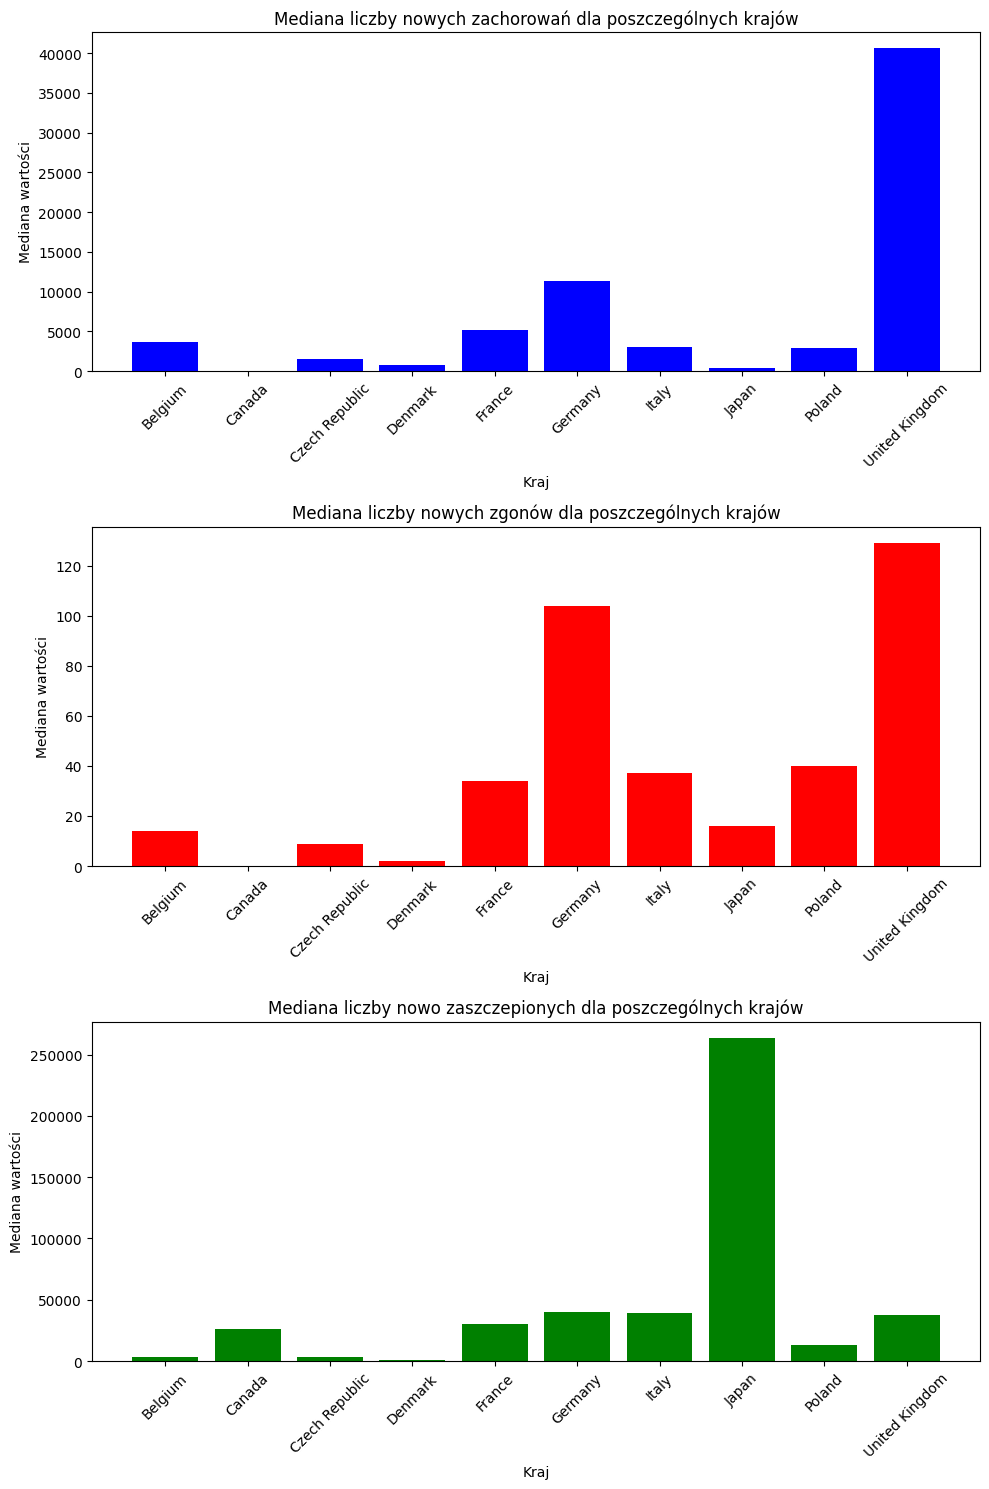

In [82]:
median_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'median', 'new_deceased': 'median', 'new_persons_vaccinated': 'median'})
median_values.reset_index(inplace=True)

index = np.arange(len(median_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, median_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Mediana liczby nowych zachorowań dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Mediana wartości')
ax[0].set_xticks(index)
ax[0].set_xticklabels(median_values['country_name'], rotation=45)

ax[1].bar(index, median_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Mediana liczby nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Mediana wartości')
ax[1].set_xticks(index)
ax[1].set_xticklabels(median_values['country_name'], rotation=45)

ax[2].bar(index, median_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Mediana liczby nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Mediana wartości')
ax[2].set_xticks(index)
ax[2].set_xticklabels(median_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


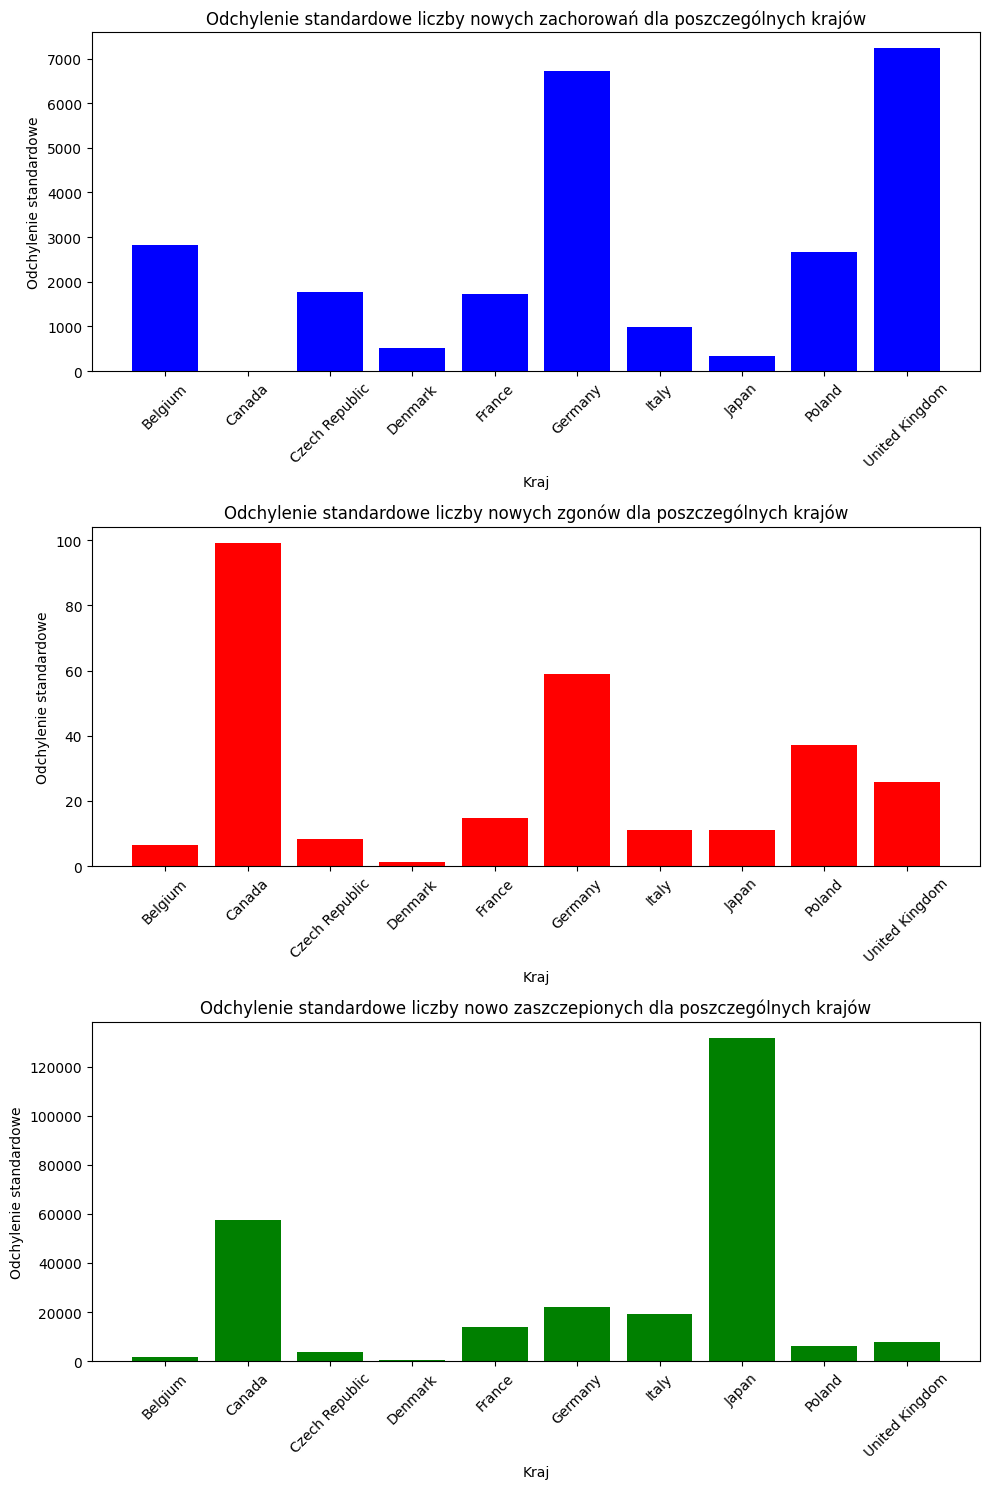

In [83]:
std_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'std', 'new_deceased': 'std', 'new_persons_vaccinated': 'std'})
std_values.reset_index(inplace=True)

index = np.arange(len(std_values['country_name']))

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index, std_values['new_confirmed'], color='blue', label='Nowe przypadki')
ax[0].set_title('Odchylenie standardowe liczby nowych zachorowań dla poszczególnych krajów')
ax[0].set_xlabel('Kraj')
ax[0].set_ylabel('Odchylenie standardowe')
ax[0].set_xticks(index)
ax[0].set_xticklabels(std_values['country_name'], rotation=45)

ax[1].bar(index, std_values['new_deceased'], color='red', label='Nowe zgony')
ax[1].set_title('Odchylenie standardowe liczby nowych zgonów dla poszczególnych krajów')
ax[1].set_xlabel('Kraj')
ax[1].set_ylabel('Odchylenie standardowe')
ax[1].set_xticks(index)
ax[1].set_xticklabels(std_values['country_name'], rotation=45)

ax[2].bar(index, std_values['new_persons_vaccinated'], color='green', label='Nowo zaszczepieni')
ax[2].set_title('Odchylenie standardowe liczby nowo zaszczepionych dla poszczególnych krajów')
ax[2].set_xlabel('Kraj')
ax[2].set_ylabel('Odchylenie standardowe')
ax[2].set_xticks(index)
ax[2].set_xticklabels(std_values['country_name'], rotation=45)

plt.tight_layout()
plt.show()

Przygotowanie danych dla 3.5 oraz 3.6

In [84]:
merged_country_df = pd.read_csv('wyniki\\merged_6_2.csv')
countries_df = merged_country_df[(merged_country_df['country_name'].isin(countries))]

df_filtered = merged_covid_df[(merged_covid_df['country_name'].isin(countries))]

min_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'min', 'new_deceased': 'min', 'new_persons_vaccinated': 'min'})
min_values.reset_index(inplace=True)

max_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'max', 'new_deceased': 'max', 'new_persons_vaccinated': 'max'})
max_values.reset_index(inplace=True)

avg_values = df_filtered.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_deceased': 'mean', 'new_persons_vaccinated': 'mean'})
avg_values.reset_index(inplace=True)

index = np.arange(len(min_values['country_name']))


3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

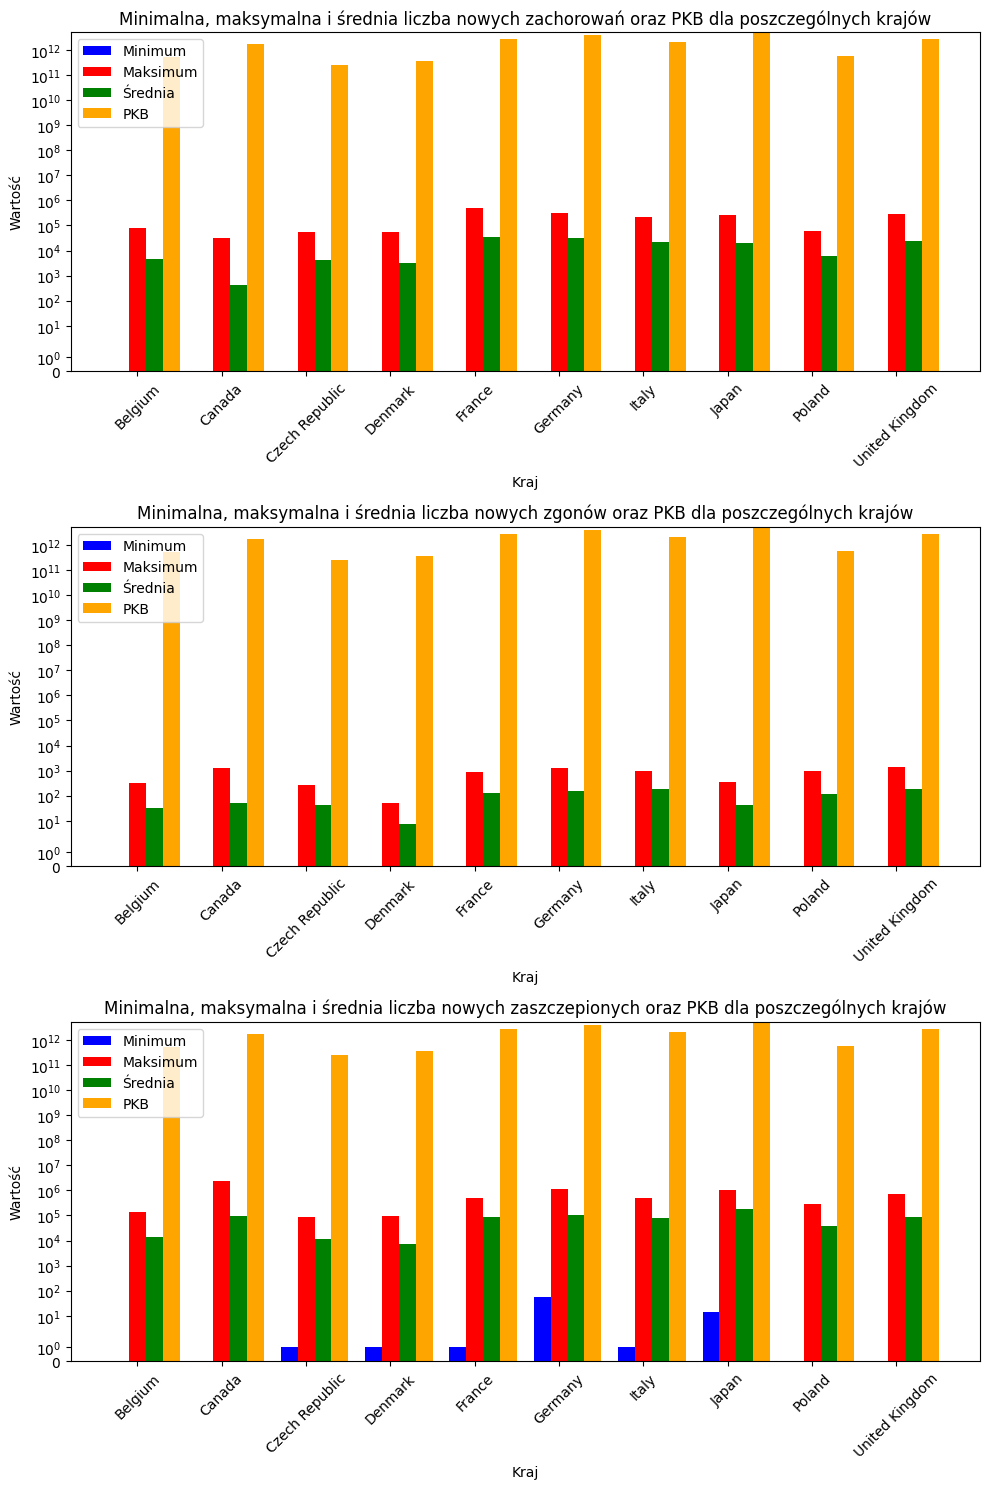

In [85]:
bar_width = 0.2

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index - bar_width, min_values['new_confirmed'], bar_width, color='blue', label='Minimum')
ax[0].bar(index, max_values['new_confirmed'], bar_width, color='red', label='Maksimum')
ax[0].bar(index + bar_width, avg_values['new_confirmed'], bar_width, color='green', label='Średnia')
ax[0].bar(index + 2 * bar_width, countries_df['gdp_usd'], bar_width, color='orange', label='PKB')

ax[1].bar(index - bar_width, min_values['new_deceased'], bar_width, color='blue', label='Minimum')
ax[1].bar(index, max_values['new_deceased'], bar_width, color='red', label='Maksimum')
ax[1].bar(index + bar_width, avg_values['new_deceased'], bar_width, color='green', label='Średnia')
ax[1].bar(index + 2 * bar_width, countries_df['gdp_usd'], bar_width, color='orange', label='PKB')

ax[2].bar(index - bar_width, min_values['new_persons_vaccinated'], bar_width, color='blue', label='Minimum')
ax[2].bar(index, max_values['new_persons_vaccinated'], bar_width, color='red', label='Maksimum')
ax[2].bar(index + bar_width, avg_values['new_persons_vaccinated'], bar_width, color='green', label='Średnia')
ax[2].bar(index + 2 * bar_width, countries_df['gdp_usd'], bar_width, color='orange', label='PKB')

for ax_i in ax:
    ax_i.set_xlabel('Kraj')
    ax_i.set_ylabel('Wartość')
    ax_i.set_xticks(index)
    ax_i.set_xticklabels(min_values['country_name'], rotation=45)
    ax_i.legend()
    ax_i.set_yscale('symlog')

ax[0].set_title('Minimalna, maksymalna i średnia liczba nowych zachorowań oraz PKB dla poszczególnych krajów')
ax[1].set_title('Minimalna, maksymalna i średnia liczba nowych zgonów oraz PKB dla poszczególnych krajów')
ax[2].set_title('Minimalna, maksymalna i średnia liczba nowych zaszczepionych oraz PKB dla poszczególnych krajów')

plt.tight_layout()
plt.show()

3.6. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.


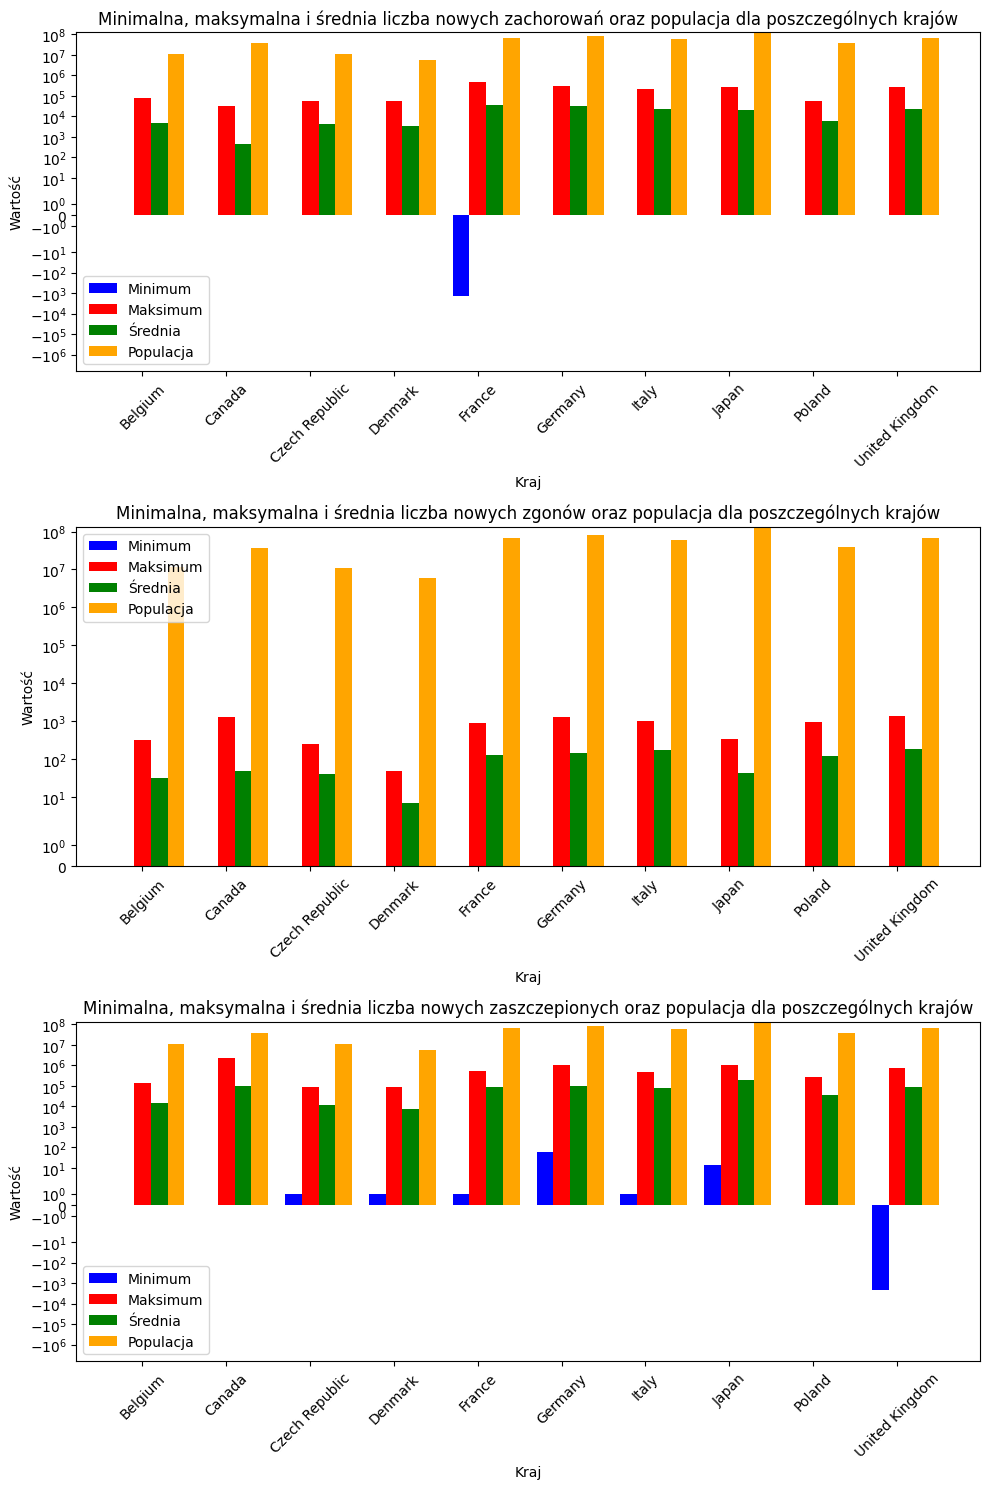

In [86]:
bar_width = 0.2

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(index - bar_width, min_values['new_confirmed'], bar_width, color='blue', label='Minimum')
ax[0].bar(index, max_values['new_confirmed'], bar_width, color='red', label='Maksimum')
ax[0].bar(index + bar_width, avg_values['new_confirmed'], bar_width, color='green', label='Średnia')
ax[0].bar(index + 2 * bar_width, countries_df['population'], bar_width, color='orange', label='Populacja')

ax[1].bar(index - bar_width, min_values['new_deceased'], bar_width, color='blue', label='Minimum')
ax[1].bar(index, max_values['new_deceased'], bar_width, color='red', label='Maksimum')
ax[1].bar(index + bar_width, avg_values['new_deceased'], bar_width, color='green', label='Średnia')
ax[1].bar(index + 2 * bar_width, countries_df['population'], bar_width, color='orange', label='Populacja')

ax[2].bar(index - bar_width, min_values['new_persons_vaccinated'], bar_width, color='blue', label='Minimum')
ax[2].bar(index, max_values['new_persons_vaccinated'], bar_width, color='red', label='Maksimum')
ax[2].bar(index + bar_width, avg_values['new_persons_vaccinated'], bar_width, color='green', label='Średnia')
ax[2].bar(index + 2 * bar_width, countries_df['population'], bar_width, color='orange', label='Populacja')

for ax_i in ax:
    ax_i.set_xlabel('Kraj')
    ax_i.set_ylabel('Wartość')
    ax_i.set_xticks(index)
    ax_i.set_xticklabels(min_values['country_name'], rotation=45)
    ax_i.legend()
    ax_i.set_yscale('symlog')

ax[0].set_title('Minimalna, maksymalna i średnia liczba nowych zachorowań oraz populacja dla poszczególnych krajów')
ax[1].set_title('Minimalna, maksymalna i średnia liczba nowych zgonów oraz populacja dla poszczególnych krajów')
ax[2].set_title('Minimalna, maksymalna i średnia liczba nowych zaszczepionych oraz populacja dla poszczególnych krajów')

plt.tight_layout()
plt.show()

Część 4

Normalizacja danych polega na przeskalowaniu wartości zmiennych do określonego zakresu, np. [0, 1], co ułatwia porównanie różnych zmiennych między sobą. 

Wykonaj normalizację dla następujących przypadków:

4.1. liczba zachorowań na określoną przez Ciebie liczbę osób (np. na 1000 osób),

4.2. liczba szczepień na określoną przez Ciebie liczbę osób (np. na 1000 osób),

4.3. liczba zgonów na określoną przez Ciebie liczbę osób (np. na 1000 osób),

4.4. co najmniej 4 dodatkowe, które uznasz za istotne. 

Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

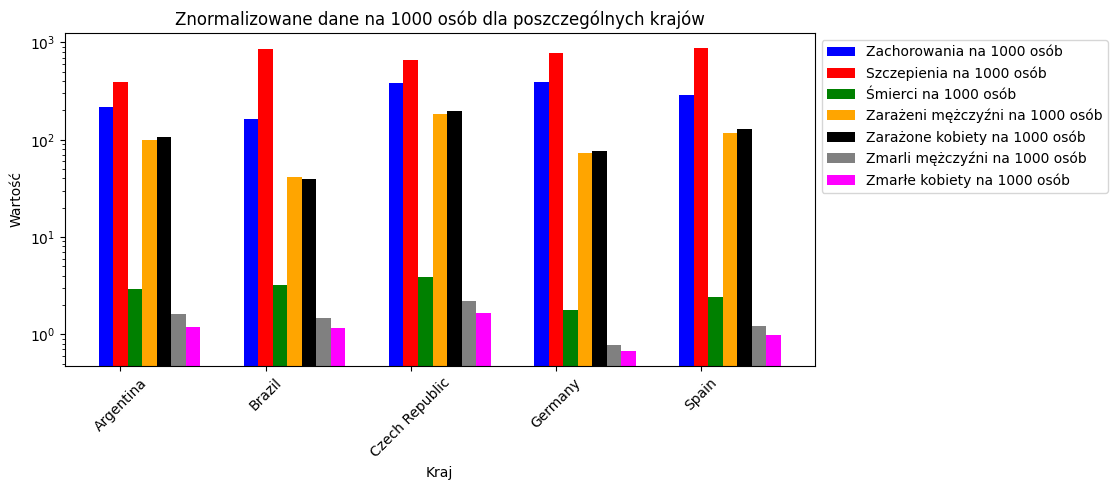

In [87]:
import numpy as np
import matplotlib.pyplot as plt

persons = 1000
countries = ['Czech Republic', 'Germany', 'Spain', 'Brazil', 'Argentina']

df_filtered = merged_covid_df[merged_covid_df['country_name'].isin(countries)]

sum_values = df_filtered.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_deceased': 'sum',
    'new_persons_vaccinated': 'sum',
    'new_confirmed_male': 'sum',
    'new_confirmed_female': 'sum',
    'new_deceased_male': 'sum',
    'new_deceased_female': 'sum'
})
sum_values.reset_index(inplace=True)

sum_values['population'] = sum_values['country_name'].map(merged_country_df.set_index('country_name')['population'])

sum_values['confirmed_per_1000'] = (sum_values['new_confirmed'] / sum_values['population']) * persons
sum_values['persons_vaccinated_per_1000'] = (sum_values['new_persons_vaccinated'] / sum_values['population']) * persons
sum_values['deceased_per_1000'] = (sum_values['new_deceased'] / sum_values['population']) * persons
sum_values['new_confirmed_male'] = (sum_values['new_confirmed_male'] / sum_values['population']) * persons
sum_values['new_confirmed_female'] = (sum_values['new_confirmed_female'] / sum_values['population']) * persons
sum_values['new_deceased_male'] = (sum_values['new_deceased_male'] / sum_values['population']) * persons
sum_values['new_deceased_female'] = (sum_values['new_deceased_female'] / sum_values['population']) * persons


index = np.arange(len(sum_values['country_name']))
bar_width = 0.1
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(index - bar_width, sum_values['confirmed_per_1000'], bar_width, color='blue', label='Zachorowania na 1000 osób')
ax.bar(index, sum_values['persons_vaccinated_per_1000'], bar_width, color='red', label='Szczepienia na 1000 osób')
ax.bar(index + bar_width, sum_values['deceased_per_1000'], bar_width, color='green', label='Śmierci na 1000 osób')
ax.bar(index + 2 * bar_width, sum_values['new_confirmed_male'], bar_width, color='orange', label='Zarażeni mężczyźni na 1000 osób')
ax.bar(index + 3 * bar_width, sum_values['new_confirmed_female'], bar_width, color='black', label='Zarażone kobiety na 1000 osób')
ax.bar(index + 4 * bar_width, sum_values['new_deceased_male'], bar_width, color='grey', label='Zmarli mężczyźni na 1000 osób')
ax.bar(index + 5 * bar_width, sum_values['new_deceased_female'], bar_width, color='magenta', label='Zmarłe kobiety na 1000 osób')

ax.set_xlabel('Kraj')
ax.set_ylabel('Wartość')
ax.set_yscale('log')
ax.set_xticks(index)
ax.set_xticklabels(sum_values['country_name'], rotation=45)
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_title('Znormalizowane dane na 1000 osób dla poszczególnych krajów')

plt.tight_layout()
plt.show()


Część 5
Misja dodatkowa - Korelacja danych

Współczynnik korelacji przedstawia związek pomiędzy dwoma zmiennymi, co pozwala na zaobserwowanie potencjalnych zależności pomiędzy informacjami. 

Stwórz macierze korelacji, które przedstawią współczynniki korelacji dla każdej pary zmiennych:

5.1. liczba nowych zachorowań, szczepień i zgonów, a liczba nowych zachorowań, szczepień i zgonów (3 istotne kombinacje),

5.2. liczba nowych zachorowań, szczepień, zgonów, a łączna liczba zachorowań, szczepień, zgonów (9 istotnych kombinacji),

5.3. wskaźniki gospodarcze, a liczba nowych zachorowań, szczepień i zgonów (co najmniej 3 istotne kombinacje),

5.4. parametry demograficzne, a liczba nowych zachorowań, szczepień i zgonów (co najmniej 3 istotne kombinacje),

5.5. co najmniej 4 dodatkowe korelacje pomiędzy różnymi danymi (co najmniej 12 istotnych kombinacji).

Przeanalizuj wyniki i omów otrzymane związki pomiędzy zmiennymi.
 

5.1. liczba nowych zachorowań, szczepień i zgonów, a liczba nowych zachorowań, szczepień i zgonów (3 istotne kombinacje),

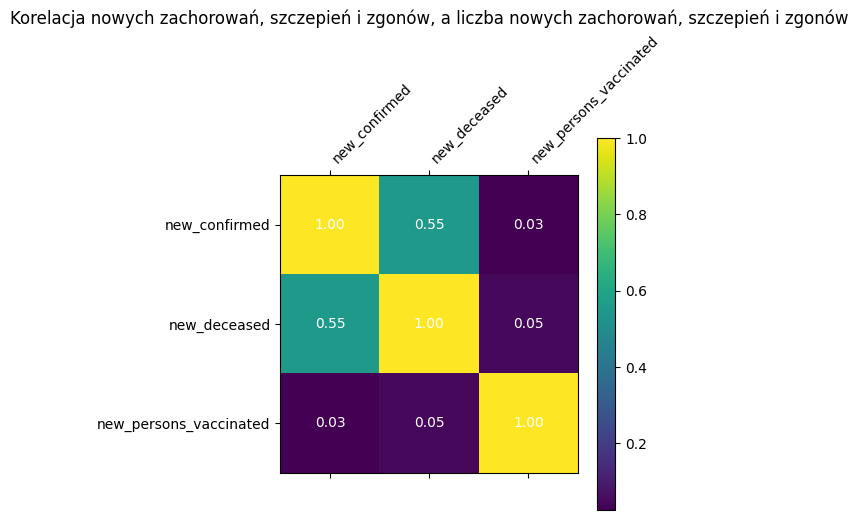

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')

selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated']
correlation_matrix = merged_covid_df[selected_columns].corr()

plt.matshow(correlation_matrix)
plt.title('Korelacja nowych zachorowań, szczepień i zgonów, a liczba nowych zachorowań, szczepień i zgonów')
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45, ha='left')
plt.yticks(range(len(selected_columns)), selected_columns)
plt.colorbar()

# Dodanie wartości korelacji na wykresie
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()

5.2. liczba nowych zachorowań, szczepień, zgonów, a łączna liczba zachorowań, szczepień, zgonów (9 istotnych kombinacji),

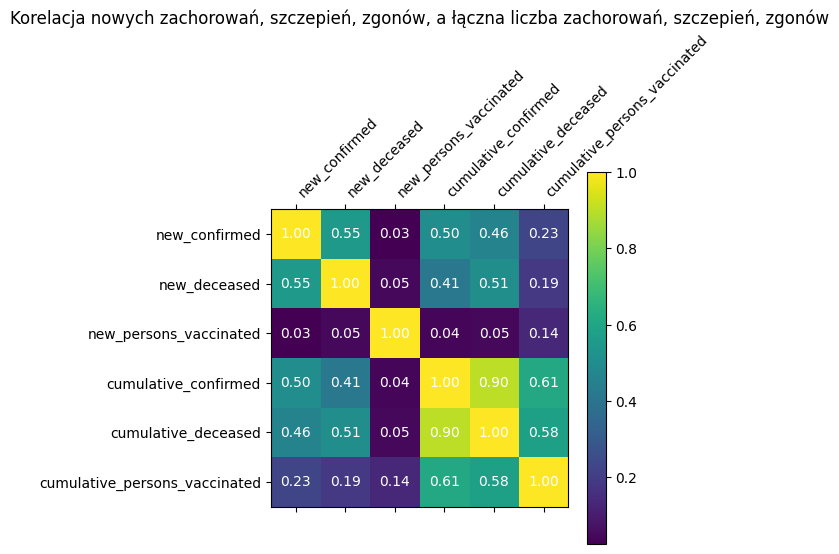

In [131]:
selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_persons_vaccinated']
correlation_matrix = merged_covid_df[selected_columns].corr()

plt.matshow(correlation_matrix)
plt.title('Korelacja nowych zachorowań, szczepień, zgonów, a łączna liczba zachorowań, szczepień, zgonów')
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45, ha='left')
plt.yticks(range(len(selected_columns)), selected_columns)
plt.colorbar()

# Dodanie wartości korelacji na wykresie
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()

5.3. wskaźniki gospodarcze, a liczba nowych zachorowań, szczepień i zgonów (co najmniej 3 istotne kombinacje),

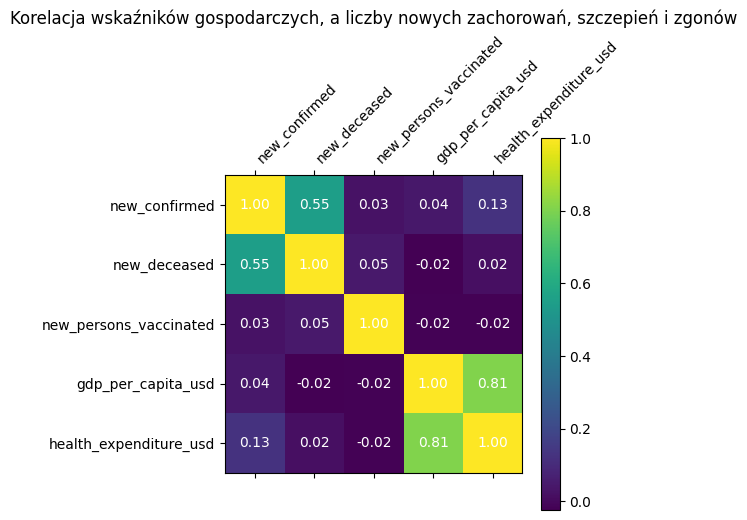

In [145]:
merged_countries_df = pd.read_csv('wyniki\\merged_6_2.csv')
selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'gdp_per_capita_usd', 'health_expenditure_usd']

merged_df = pd.merge(merged_covid_df, merged_countries_df[['country_name', 'gdp_per_capita_usd']], on='country_name', how='left')
merged_df = pd.merge(merged_df, merged_countries_df[['country_name', 'health_expenditure_usd']], on='country_name', how='left')
correlation_matrix = merged_df[selected_columns].corr()

plt.matshow(correlation_matrix)
plt.title('Korelacja wskaźników gospodarczych, a liczby nowych zachorowań, szczepień i zgonów')
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45, ha='left')
plt.yticks(range(len(selected_columns)), selected_columns)
plt.colorbar()

# Dodanie wartości korelacji na wykresie
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()

5.4. parametry demograficzne, a liczba nowych zachorowań, szczepień i zgonów (co najmniej 3 istotne kombinacje),

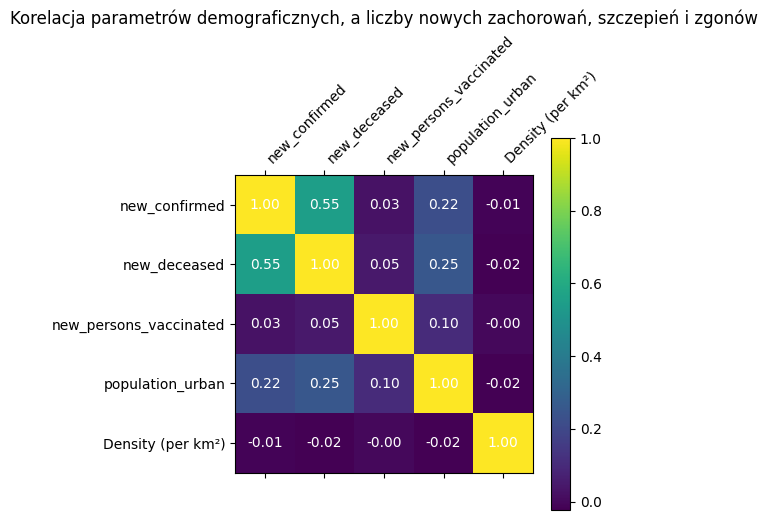

In [149]:
selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'population_urban', 'Density (per km²)']

merged_df = pd.merge(merged_covid_df, merged_countries_df[['country_name', 'population_urban']], on='country_name', how='left')
merged_df = pd.merge(merged_df, merged_countries_df[['country_name', 'Density (per km²)']], on='country_name', how='left')
correlation_matrix = merged_df[selected_columns].corr()

plt.matshow(correlation_matrix)
plt.title('Korelacja parametrów demograficznych, a liczby nowych zachorowań, szczepień i zgonów')
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45, ha='left')
plt.yticks(range(len(selected_columns)), selected_columns)
plt.colorbar()

# Dodanie wartości korelacji na wykresie
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()

5.5. co najmniej 4 dodatkowe korelacje pomiędzy różnymi danymi (co najmniej 12 istotnych kombinacji).

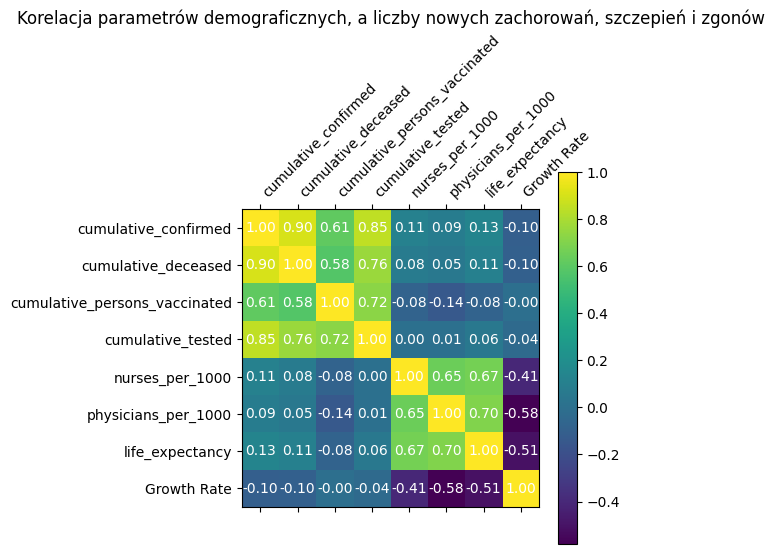

In [150]:
selected_columns = ['cumulative_confirmed', 'cumulative_deceased', 'cumulative_persons_vaccinated', 'cumulative_tested', 'nurses_per_1000', 'physicians_per_1000', 'life_expectancy', 'Growth Rate']

merged_df = pd.merge(merged_covid_df, merged_countries_df[['country_name', 'nurses_per_1000']], on='country_name', how='left')
merged_df = pd.merge(merged_df, merged_countries_df[['country_name', 'physicians_per_1000']], on='country_name', how='left')
merged_df = pd.merge(merged_df, merged_countries_df[['country_name', 'life_expectancy']], on='country_name', how='left')
merged_df = pd.merge(merged_df, merged_countries_df[['country_name', 'Growth Rate']], on='country_name', how='left')

correlation_matrix = merged_df[selected_columns].corr()

plt.matshow(correlation_matrix)
plt.title('Korelacja parametrów demograficznych, a liczby nowych zachorowań, szczepień i zgonów')
plt.xticks(range(len(selected_columns)), selected_columns, rotation=45, ha='left')
plt.yticks(range(len(selected_columns)), selected_columns)
plt.colorbar()

# Dodanie wartości korelacji na wykresie
for i in range(len(selected_columns)):
    for j in range(len(selected_columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.show()

#W tym podpunkcie
#trzeba policzyc czy istotnych kombinacji bedzie 12 

#We wszystkich z 5
# Jakoś ładnie te dane zaprezentować, typu na osi x dane związane z chorobami, na osi y dane zwiazane z krajem
# w 5.2 mozna ze dane zwiazane z nowymi na osi x, a ze wszystykimi na osy y, no coś wymyślisz
# opisac wnioski, cos w stylu, ze im wieksza populacja w miastach tym jest wiecej zgonow i zachorowan i jakas tam korelacja wystepuje, no nie wiem xD